## Regression in keras

In [78]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Gnerate Data SEt for regrssion

In [79]:
from sklearn.datasets import make_regression
X, Y =make_regression(n_samples=1000,n_features=10,noise=10,n_informative=6,random_state=45)

In [80]:
X[:5]

array([[ 0.83792737,  0.62783581, -1.81548423,  0.29076177, -0.42685615,
         0.3665482 , -0.37518955, -0.62720387,  0.37949431, -1.61576754],
       [ 0.91960508, -0.36965774,  0.46165001,  1.55352557, -0.45478778,
        -0.81412114,  0.40820595, -0.10021234, -1.13271074,  0.22224591],
       [ 0.63598412, -0.38507179,  0.98129377,  1.3677489 , -0.29676543,
         2.22866175, -1.27912812,  1.10466337,  1.12655756, -0.50327101],
       [ 0.35113842, -0.57891311,  0.58410619,  1.85721408, -1.14907957,
         1.03986499,  2.77099871, -0.76269569, -0.6949425 ,  1.13931284],
       [-0.08582706,  1.17580423,  1.19474998, -1.4188167 ,  0.54855504,
         0.70212439, -2.58623652, -0.8362182 ,  1.0056735 ,  0.25394797]])

In [81]:
Y[:5]

array([  12.60579898,   15.80518452,   52.66974229, -138.93892913,
         63.04904869])

In [82]:
import pandas as pd
X=pd.DataFrame(X)

In [83]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.837927,0.627836,-1.815484,0.290762,-0.426856,0.366548,-0.375190,-0.627204,0.379494,-1.615768
1,0.919605,-0.369658,0.461650,1.553526,-0.454788,-0.814121,0.408206,-0.100212,-1.132711,0.222246
2,0.635984,-0.385072,0.981294,1.367749,-0.296765,2.228662,-1.279128,1.104663,1.126558,-0.503271
3,0.351138,-0.578913,0.584106,1.857214,-1.149080,1.039865,2.770999,-0.762696,-0.694943,1.139313
4,-0.085827,1.175804,1.194750,-1.418817,0.548555,0.702124,-2.586237,-0.836218,1.005673,0.253948


In [84]:
cols=[f'x{i+1}'for i in range(10)]
cols

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [85]:
X.columns=cols
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.837927,0.627836,-1.815484,0.290762,-0.426856,0.366548,-0.375190,-0.627204,0.379494,-1.615768
1,0.919605,-0.369658,0.461650,1.553526,-0.454788,-0.814121,0.408206,-0.100212,-1.132711,0.222246
2,0.635984,-0.385072,0.981294,1.367749,-0.296765,2.228662,-1.279128,1.104663,1.126558,-0.503271
3,0.351138,-0.578913,0.584106,1.857214,-1.149080,1.039865,2.770999,-0.762696,-0.694943,1.139313
4,-0.085827,1.175804,1.194750,-1.418817,0.548555,0.702124,-2.586237,-0.836218,1.005673,0.253948


In [86]:
Y=pd.DataFrame(Y)
Y.columns=['Y']
Y.head()

,Y
0,12.605799
1,15.805185
2,52.669742
3,-138.938929
4,63.049049


In [87]:
X.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

### Preprocessing on X dataframe - Scikit Learn pipelines

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [89]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [90]:
X_pre=num_pipe.fit_transform(X)
X_pre

array([[ 0.80645875,  0.66693244, -1.81614953, ..., -0.63810523,
         0.34037643, -1.65071543],
       [ 0.88696245, -0.32701783,  0.47907949, ..., -0.10614359,
        -1.15099565,  0.22613813],
       [ 0.6074182 , -0.34237713,  1.0028525 , ...,  1.11009543,
         1.07714772, -0.51471011],
       ...,
       [ 1.12486096, -0.99208203, -0.17895809, ...,  0.26226957,
         0.04262856, -0.5298615 ],
       [-0.41774431,  2.51543603,  0.24226588, ..., -0.42752834,
         0.2478322 , -0.23068655],
       [ 0.76112904, -1.48718546,  1.25001744, ...,  0.89539337,
         0.40721174, -0.53123667]])

In [91]:
cols=num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'],
      dtype=object)

In [92]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.806459,0.666932,-1.816150,0.327141,-0.443286,0.400837,-0.394957,-0.638105,0.340376,-1.650715
1,0.886962,-0.327018,0.479079,1.642394,-0.471719,-0.769903,0.386846,-0.106144,-1.150996,0.226138
2,0.607418,-0.342377,1.002852,1.448895,-0.310864,2.247291,-1.297058,1.110095,1.077148,-0.514710
3,0.326667,-0.535530,0.602509,1.958706,-1.178456,1.068492,2.744836,-0.774875,-0.719258,1.162584
4,-0.104018,1.212954,1.218005,-1.453499,0.549610,0.733591,-2.601509,-0.849091,0.957929,0.258510


In [93]:
X_pre.median()

x1    -0.039848
x2    -0.022435
x3    -0.017695
x4    -0.017987
x5    -0.005322
x6    -0.035901
x7    -0.037796
x8    -0.005218
x9     0.011616
x10    0.008344
dtype: float64

In [94]:
X_pre.std()

x1     1.0005
x2     1.0005
x3     1.0005
x4     1.0005
x5     1.0005
x6     1.0005
x7     1.0005
x8     1.0005
x9     1.0005
x10    1.0005
dtype: float64

### Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=40)


In [96]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
970,0.976567,1.841000,-1.929053,1.353463,0.511631,-0.222417,2.203949,0.905693,0.406189,2.056477
137,-0.600498,-0.010706,-0.234694,-0.831905,0.430001,-0.170409,-0.679779,-0.066034,-0.227860,-0.087843
82,-0.199920,-0.460294,-1.162526,-1.615935,-0.908851,0.141513,0.130891,0.467028,-1.397042,0.527348
188,-0.520491,0.403826,-2.156195,0.639152,0.825526,-1.300016,1.466059,0.763038,1.484428,1.400302
358,-0.533239,0.768385,0.097298,-0.342510,1.153275,1.808243,0.128846,0.503375,-0.034085,-0.443929


In [97]:
ytrain.head()

,Y
970,313.249294
137,-11.449286
82,-87.826604
188,110.397575
358,146.226667


In [98]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
204,-1.197522,-0.204013,1.375661,-1.026298,2.655075,0.595093,-2.072878,0.309150,-0.269186,-1.720511
71,-1.183582,-0.384396,1.049313,-0.365194,-0.750863,0.857688,-0.570766,0.361526,0.934864,1.331427
594,-0.478827,-0.184163,-1.836524,-1.164319,-0.786392,0.177233,0.852520,1.175217,2.409104,-0.147888
672,-0.867263,0.946244,1.207876,0.289385,0.729491,-0.412139,1.364977,-0.201249,-0.473897,-0.666355
14,0.480245,-1.036075,0.134806,-0.312055,-0.917405,0.368541,-2.077744,-0.410088,-0.464906,0.648025


In [99]:
ytest.head()

,Y
204,117.280207
71,-139.344199
594,-52.200451
672,39.797586
14,-131.040234


In [100]:
xtrain.shape

(800, 10)

In [101]:
xtest.shape

(200, 10)

### Creating a Keras Model

In [102]:
from keras.models import Sequential
from keras.layers import Dense

In [103]:
# Intialize the Neural Network Model
nn = Sequential()

# Input + hidden layer 1
nn.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))

# Hidden Layer 2
nn.add(Dense(32, activation='relu'))

# Output Layer
nn.add(Dense(1, activation='linear'))

### compile the model

In [104]:
 nn.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [105]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit the Neural Network

In [106]:
hist=nn.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
 1/20 [>.............................] - ETA: 20s - loss: 25185.6172 - mae: 127.9430

20/20 [==============================] - 1s 20ms/step - loss: 23607.8320 - mae: 120.1883 - val_loss: 22508.5898 - val_mae: 123.4300
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 23485.6406 - mae: 119.8704 - val_loss: 22363.9336 - val_mae: 123.0181
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 23283.8633 - mae: 119.3329 - val_loss: 22094.3301 - val_mae: 122.2500
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 22919.4648 - mae: 118.3571 - val_loss: 21638.3789 - val_mae: 120.9269
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 22317.0352 - mae: 116.6934 - val_loss: 20923.8867 - val_mae: 118.8044
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 21408.0293 - mae: 114.0670 - val_loss: 19836.5879 - val_mae: 115.4859
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 20012.9824 - mae: 110.0888 - val_loss: 18311.6816 - val_mae: 110.6353
Epoch 8/10

### Plot the Learning Curve

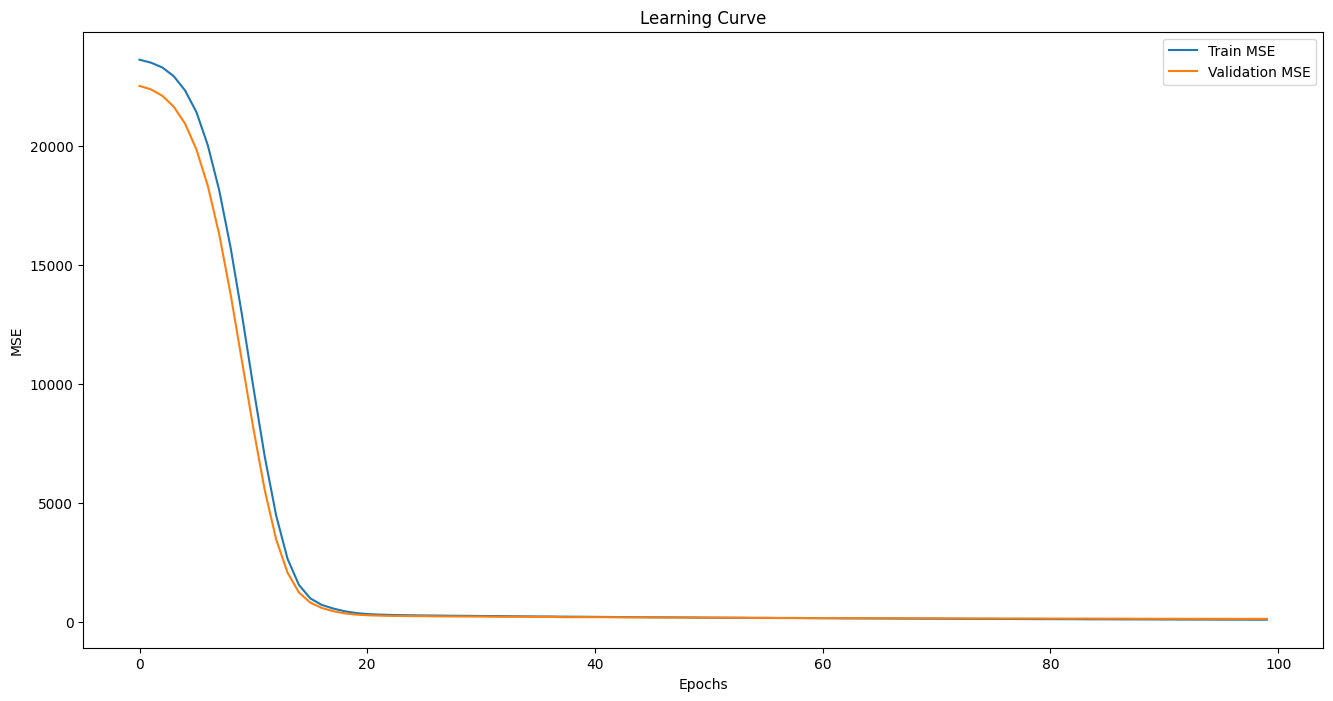

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Train MSE')
plt.plot(hist.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


### Evaluate the Model

In [108]:
nn.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 105.5698 - mae: 8.0957


[105.5698471069336, 8.095690727233887]

In [109]:
nn.evaluate(xtest,ytest)

7/7 [==============================] - 0s 3ms/step - loss: 133.9745 - mae: 9.2273


[133.97454833984375, 9.227258682250977]

### Predict train and test

In [110]:
ypred_tr=nn.predict(xtrain)
ypred_ts=nn.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [111]:
ypred_tr[0:5]

array([[314.7937  ],
       [-14.109527],
       [-99.206505],
       [118.14845 ],
       [149.42787 ]], dtype=float32)

In [112]:
ytrain.head()

,Y
970,313.249294
137,-11.449286
82,-87.826604
188,110.397575
358,146.226667


In [113]:
ypred_ts[0:5]

array([[ 141.84569],
       [-146.52357],
       [ -48.02414],
       [  48.11269],
       [-136.19743]], dtype=float32)

In [114]:
ytest.head()

,Y
204,117.280207
71,-139.344199
594,-52.200451
672,39.797586
14,-131.040234


### R2 scores in train and test

In [115]:
from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain, ypred_tr)
tr_r2

0.9954973910117844

In [116]:
ts_r2 = r2_score(ytest, ypred_ts)
ts_r2

0.9930919977744437

### Save the model for future reference

In [117]:
nn.save('RegessionModel.keras')

### Load the model back

In [118]:
from keras.models import load_model
model = load_model('RegessionModel.keras')

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
